In [1]:
#imports
try:
  # The %tensorflow_version magic only works in colab.
  %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

import os
import numpy as np
# import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TensorFlow 2.x selected.


In [ ]:
#downloading weights from google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
download = drive.CreateFile({'id': '1vDk5TbaXylcjbaxpH6YTyknOQV01C2_3'})
download.GetContentFile('brain_model_finetune_v8.h5')

In [ ]:
#downloading data from google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
download = drive.CreateFile({'id': '1mWEZrLAHiUaMPxC5dx3c5XKb0xWtl8cs'})
download.GetContentFile('training_data_v3.zip')

In [4]:
#unzip the data in current directory
!unzip training_data_v3.zip

Archive:  training_data_v3.zip
   creating: training_data_v3/
   creating: training_data_v3/train/
   creating: training_data_v3/train/glioma/
  inflating: training_data_v3/train/glioma/glioma_2386.jpg  
  inflating: training_data_v3/train/glioma/glioma_757.jpg  
  inflating: training_data_v3/train/glioma/glioma_802.jpg  
  inflating: training_data_v3/train/glioma/glioma_2756.jpg  
  inflating: training_data_v3/train/glioma/glioma_2981.jpg  
  inflating: training_data_v3/train/glioma/glioma_822.jpg  
  inflating: training_data_v3/train/glioma/glioma_2385.jpg  
  inflating: training_data_v3/train/glioma/glioma_2214.jpg  
  inflating: training_data_v3/train/glioma/glioma_1941.jpg  
  inflating: training_data_v3/train/glioma/glioma_2663.jpg  
  inflating: training_data_v3/train/glioma/glioma_767.jpg  
  inflating: training_data_v3/train/glioma/glioma_2572.jpg  
  inflating: training_data_v3/train/glioma/glioma_2189.jpg  
  inflating: training_data_v3/train/glioma/glioma_2119.jpg  
  infla

In [ ]:
#load trained model
model = tf.keras.models.load_model('brain_model_finetune_v8.h5')

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 32)          147488    
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 132       
Total params: 14,862,308
Trainable params: 7,227,044
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
base_dir = "training_data_v3"
#defining the path of train , val and test data
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
(IMG_HEIGHT,IMG_WIDTH) = (224,224)
batch_size = 160

In [ ]:
#testing data as batches of tensor image data
test_image_generator = ImageDataGenerator(rescale=1./255)

In [10]:
test_data_generator = test_image_generator.flow_from_directory(
    directory = test_dir,
    target_size = (IMG_HEIGHT,IMG_WIDTH),
    batch_size = batch_size,
    class_mode = "categorical"
)

Found 160 images belonging to 4 classes.


In [12]:
labels = test_data_generator.class_indices
print(labels)

{'glioma': 0, 'meningioma': 1, 'no_tumor': 2, 'pituitary': 3}


In [13]:
# Learn about dataset labels

dataset_labels = sorted(test_data_generator.class_indices.items())
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Glioma' 'Meningioma' 'No_Tumor' 'Pituitary']


In [14]:
#check the shape
test_image_batch, test_label_batch = next(iter(test_data_generator))
true_label_ids = np.argmax(test_label_batch, axis=-1)

print("test batch shape:", test_image_batch.shape)

test batch shape: (160, 224, 224, 3)


In [15]:
test_image_batch[0].shape

(224, 224, 3)

In [16]:
# predict probabilities for test set

yhat_probs = model.predict(test_image_batch)
yhat_probs

array([[7.12521887e-06, 3.74958827e-03, 3.68503663e-08, 9.96243358e-01],
       [7.33788541e-09, 4.83028060e-13, 1.00000000e+00, 4.63568038e-11],
       [9.99750793e-01, 2.41504094e-04, 1.96582732e-08, 7.72663407e-06],
       [2.96683423e-03, 9.97029662e-01, 7.77009845e-10, 3.45332478e-06],
       [4.24396567e-05, 9.93236005e-01, 6.92121471e-10, 6.72162184e-03],
       [2.10764259e-08, 4.42007831e-06, 9.03658659e-08, 9.99995470e-01],
       [6.56759909e-08, 2.05310568e-13, 9.99999881e-01, 1.26351402e-10],
       [7.86203636e-09, 4.23168785e-07, 9.99996662e-01, 2.83999020e-06],
       [2.19167280e-03, 2.27646979e-07, 9.97551620e-01, 2.56498141e-04],
       [7.11536643e-08, 2.84379348e-04, 8.00653588e-09, 9.99715507e-01],
       [1.77028170e-03, 9.76563931e-01, 3.42914348e-07, 2.16653962e-02],
       [1.22936341e-04, 9.98537540e-01, 7.01545346e-08, 1.33945618e-03],
       [9.99999523e-01, 3.72228577e-08, 2.96021252e-09, 4.46843245e-07],
       [1.48027798e-10, 3.41208681e-04, 2.66731615e

In [17]:
# predict classes for test set
yhat_classes = model.predict_classes(test_image_batch, verbose=0)
yhat_classes 

array([3, 2, 0, 1, 1, 3, 2, 2, 2, 3, 1, 1, 0, 3, 3, 1, 0, 3, 3, 0, 1, 2,
       1, 1, 2, 1, 1, 3, 0, 3, 0, 2, 0, 3, 3, 0, 1, 1, 2, 2, 0, 3, 2, 2,
       2, 1, 1, 2, 1, 2, 0, 2, 3, 3, 1, 2, 2, 1, 3, 1, 2, 2, 3, 1, 3, 0,
       1, 0, 3, 3, 1, 2, 3, 0, 1, 1, 0, 2, 2, 3, 0, 1, 1, 0, 2, 0, 3, 0,
       3, 3, 3, 3, 0, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 2, 3, 2, 3, 2,
       0, 2, 2, 1, 2, 1, 1, 0, 3, 2, 0, 2, 3, 3, 0, 3, 1, 2, 0, 1, 0, 1,
       3, 1, 3, 0, 0, 3, 0, 2, 3, 0, 1, 1, 3, 2, 1, 0, 1, 1, 1, 3, 3, 0,
       3, 3, 0, 3, 0, 2])

In [18]:
#convert numeric classes to real name class
pred_class = np.array(list(list(labels.keys())[list(labels.values()).index(i)] for i in yhat_classes))
pred_class

array(['pituitary', 'no_tumor', 'glioma', 'meningioma', 'meningioma',
       'pituitary', 'no_tumor', 'no_tumor', 'no_tumor', 'pituitary',
       'meningioma', 'meningioma', 'glioma', 'pituitary', 'pituitary',
       'meningioma', 'glioma', 'pituitary', 'pituitary', 'glioma',
       'meningioma', 'no_tumor', 'meningioma', 'meningioma', 'no_tumor',
       'meningioma', 'meningioma', 'pituitary', 'glioma', 'pituitary',
       'glioma', 'no_tumor', 'glioma', 'pituitary', 'pituitary', 'glioma',
       'meningioma', 'meningioma', 'no_tumor', 'no_tumor', 'glioma',
       'pituitary', 'no_tumor', 'no_tumor', 'no_tumor', 'meningioma',
       'meningioma', 'no_tumor', 'meningioma', 'no_tumor', 'glioma',
       'no_tumor', 'pituitary', 'pituitary', 'meningioma', 'no_tumor',
       'no_tumor', 'meningioma', 'pituitary', 'meningioma', 'no_tumor',
       'no_tumor', 'pituitary', 'meningioma', 'pituitary', 'glioma',
       'meningioma', 'glioma', 'pituitary', 'pituitary', 'meningioma',
       'no_tu

In [ ]:
#calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [20]:
testy = np.array([np.where(r==1)[0][0] for r in test_label_batch])
testy

array([3, 2, 0, 1, 1, 3, 2, 2, 2, 3, 1, 1, 0, 3, 3, 1, 0, 3, 3, 0, 0, 2,
       1, 1, 2, 0, 1, 1, 0, 3, 0, 2, 0, 3, 3, 0, 1, 1, 2, 2, 0, 3, 2, 2,
       2, 1, 1, 2, 1, 2, 0, 2, 1, 3, 1, 2, 2, 1, 3, 1, 2, 2, 3, 1, 3, 0,
       1, 0, 3, 3, 1, 2, 3, 0, 1, 1, 0, 2, 2, 3, 0, 1, 1, 0, 2, 0, 3, 0,
       3, 3, 3, 3, 0, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 2, 3, 2, 3, 2,
       0, 2, 2, 0, 2, 1, 1, 0, 3, 2, 0, 2, 3, 3, 0, 3, 1, 2, 0, 0, 0, 1,
       3, 1, 3, 0, 0, 3, 0, 2, 3, 0, 1, 1, 3, 2, 3, 0, 1, 1, 1, 3, 3, 0,
       1, 3, 0, 3, 1, 2])

In [21]:
test_real = np.array(list(list(labels.keys())[list(labels.values()).index(i)] for i in testy))
test_real

array(['pituitary', 'no_tumor', 'glioma', 'meningioma', 'meningioma',
       'pituitary', 'no_tumor', 'no_tumor', 'no_tumor', 'pituitary',
       'meningioma', 'meningioma', 'glioma', 'pituitary', 'pituitary',
       'meningioma', 'glioma', 'pituitary', 'pituitary', 'glioma',
       'glioma', 'no_tumor', 'meningioma', 'meningioma', 'no_tumor',
       'glioma', 'meningioma', 'meningioma', 'glioma', 'pituitary',
       'glioma', 'no_tumor', 'glioma', 'pituitary', 'pituitary', 'glioma',
       'meningioma', 'meningioma', 'no_tumor', 'no_tumor', 'glioma',
       'pituitary', 'no_tumor', 'no_tumor', 'no_tumor', 'meningioma',
       'meningioma', 'no_tumor', 'meningioma', 'no_tumor', 'glioma',
       'no_tumor', 'meningioma', 'pituitary', 'meningioma', 'no_tumor',
       'no_tumor', 'meningioma', 'pituitary', 'meningioma', 'no_tumor',
       'no_tumor', 'pituitary', 'meningioma', 'pituitary', 'glioma',
       'meningioma', 'glioma', 'pituitary', 'pituitary', 'meningioma',
       'no_tumor', 

In [22]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testy, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testy, yhat_classes,average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testy, yhat_classes,average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yhat_classes,average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.943750
Precision: 0.943750
Recall: 0.943750
F1 score: 0.943750


[[36  4  0  0]
 [ 1 36  0  3]
 [ 0  0 40  0]
 [ 0  1  0 39]]


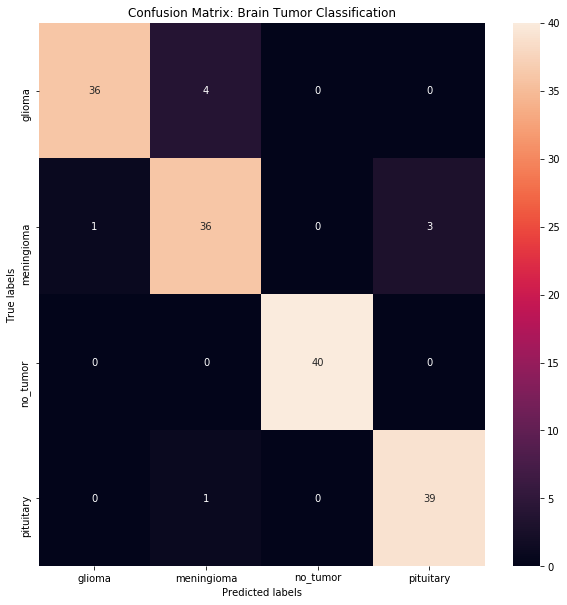

In [23]:
# confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(test_real, pred_class,labels = list(labels.keys()))
print(cm)
plt.figure(figsize=(10,10))
ax= plt.subplot('111')
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix: Brain Tumor Classification'); 
ax.xaxis.set_ticklabels(list(labels.keys())); ax.yaxis.set_ticklabels(list(labels.keys()));